# Aim : To find the rate of spread of covid under different conditions

In [261]:
# Common variables

N = 1       # Number of simulations for a given set of conditions
P = 1000    # Number of people in each simulation
L = 10      # Size of the square box
r = 0.1     # Radius of infection
p = 0.1     # Probability of getting infected
T = 10     # Number of time steps in a day
D = 10      # Number of days the person stays infected


# Baseline :

P people are standing inside a L x L square. They are moving in random manner. If they get close to an infected person then they have a probability p to get infected. New infections are activated at the end of the day. Time spent near the person is not related to the probabiity of getting infected. infections are detected once the total number of infected reaches one percent of the population (though there are no counter measures at the moment). The total population is divided into 3 parts:
S : Susceptible
I : Infected
R : Removed (Dead or cured/immune from now on)
Simulations ends when there are no more infected. Infections ends in D days.

In [246]:
import random
import math
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [259]:
# Baseline support functions and classes

class Person:
    
    def __init__(self, pos):
        
        self.pos = pos
        self.status = 'S'
        self.proximity_to_infected = False
        self.days_infected = 0


class Population:
    
    def __init__(self, P, L, r, p, T):
        
        self.P = P
        self.L = L
        self.r = r
        self.p = p
        self.T = T
        self.D = D
        self.Pop = [self.generate_person() for i in range(self.P)]
        self.n_S = self.P
        self.n_I = 0
        self.n_R = 0

    def generate_person(self):
        
        pos = [random.random()*self.L, random.random()*self.L]
        return Person(pos)
    
    def show_pos(self):
        
        clear_output(wait = True)
        plt.figure(figsize=(8,8))
        
        for S,color in zip(['S', 'I', 'R'], ['cyan', 'orange', 'black']):

            pos_x = [-1]*self.P
            pos_y = [-1]*self.P

            for i in range(self.P):

                if self.Pop[i].status == S:
                    
                    pos_x[i], pos_y[i] = self.Pop[i].pos[0], self.Pop[i].pos[1] 
                    
            pos_x = [i for i in pos_x if i != -1]
            pos_y = [i for i in pos_y if i != -1]

            plt.scatter(pos_x, pos_y, s = 6, c = color)
        
        plt.show()
        
    
    def start_infection(self):
        
        self.Pop[0].status = 'I'
        self.n_S -= 1
        self.n_I += 1
        self.Pop[0].days_infected = 1
        
    def move_person(self, i, v):
    
        theta = random.random()*math.pi*2 
        current_pos = self.Pop[i].pos
        self.Pop[i].pos = [current_pos[0] + v*math.cos(theta), current_pos[1] + v*math.sin(theta)]
        if self.Pop[i].pos[0] < 0:
            self.Pop[i].pos[0] = 0
        elif self.Pop[i].pos[0] > self.L:
            self.Pop[i].pos[0] = self.L
            
        if self.Pop[i].pos[1] < 0:
            self.Pop[i].pos[1] = 0
        elif self.Pop[i].pos[1] > self.L:
            self.Pop[i].pos[1] = self.L
            
    def infection_distance(self):
        
        infected_pos = []
        
        for i in range(self.P):
            
            if self.Pop[i].status == 'I':
                
                infected_pos.append(self.Pop[i].pos)
                
        for i in range(self.P):
            
            if self.Pop[i].status != 'S':
                
                continue
                
            if self.Pop[i].proximity_to_infected:
                
                continue
            
            x,y = self.Pop[i].pos[0], self.Pop[i].pos[1]
            
            for i_pos in infected_pos:
                
                dis = math.sqrt((i_pos[0] - x)**2 + (i_pos[1] - y)**2)
                
                if dis < self.r:
                    
                    self.Pop[i].proximity_to_infected = True        
    
    
    def Simulate_day(self, v):
        
        # Running the simulation for a day
        
        for _ in range(self.T):
            
            for i in range(self.P):
                
                self.move_person(i, v)
            
            self.infection_distance()
    
    
    def set_infections(self):
        
        for i in range(self.P):
            
            if self.Pop[i].status == 'S' and self.Pop[i].proximity_to_infected:
                
                if random.random() <= self.p:
                    
                    self.Pop[i].status = 'I'
                    self.Pop[i].proximity_to_infected = 1
                    self.n_I += 1
                    self.n_S -= 1
                
                else:
                    
                    self.Pop[i].proximity_to_infected = False
                
            elif self.Pop[i].status == 'I':
                
                if self.Pop[i].days_infected <= self.D:
                    
                    self.Pop[i].days_infected += 1
                
                else:
                    
                    self.Pop[i].status = 'R'
                    self.Pop[i].days_infected = 0
                    self.n_I -= 1
                    self.n_R += 1
    
    
    def baseline_exp_show(self, v):
        
        sus = []
        inf = []
        rem = []
        
        while self.n_I != 0:
            
            self.Simulate_day(v)
            self.set_infections()
            time.sleep(0.1)
            self.show_pos()
            sus.append(self.n_S)
            inf.append(self.n_I)
            rem.append(self.n_R)
        
        return sus, inf, rem
            
            
    def baseline_exp(self, v):
        
        sus = []
        inf = []
        rem = []
        
        while self.n_I != 0:
            
            self.Simulate_day(v)
            self.set_infections()
            sus.append(self.n_S)
            inf.append(self.n_I)
            rem.append(self.n_R)
        
#         plt.figure()
        plt.plot(sus)
        plt.plot(inf)
        plt.plot(rem)
        
        return sus, inf, rem
            
        



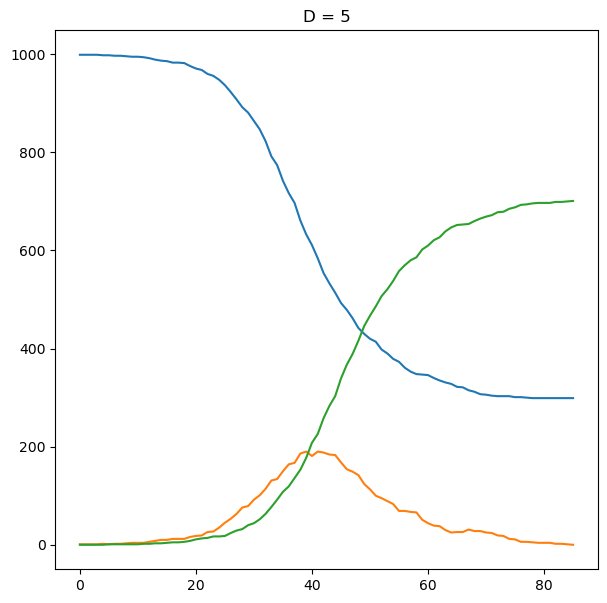

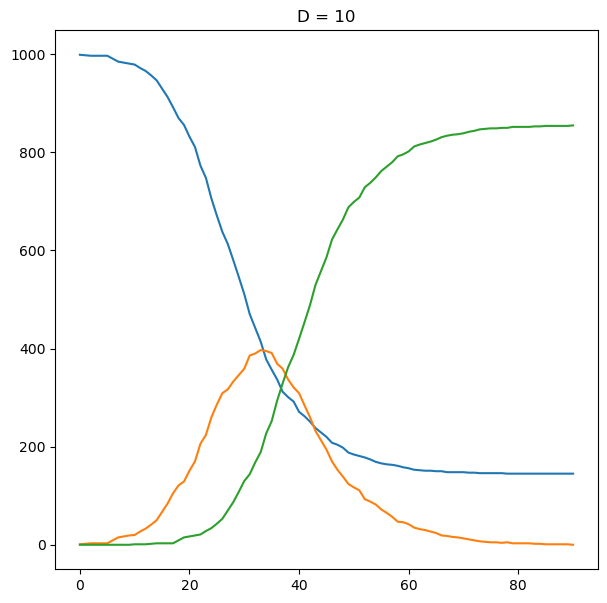

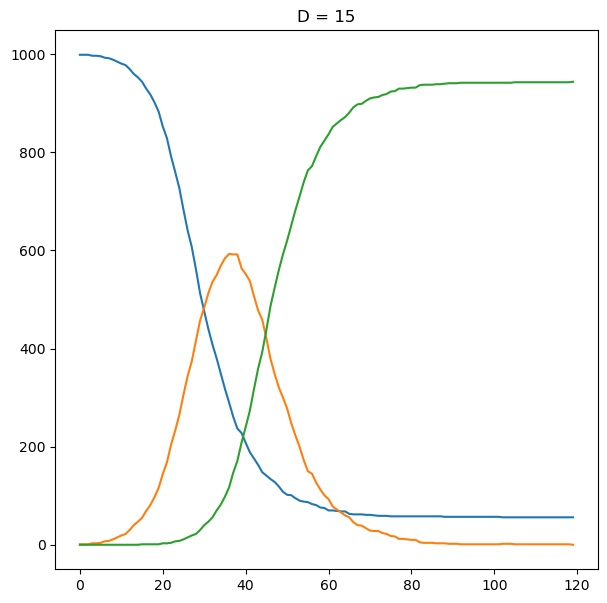

In [251]:
# Baseline variables : effect of p

v = 0.5    # Drift velocity
r = 0.1
p = 0.1

for D in [5, 10, 15]:

    plt.figure(figsize = (7,7))
    G = Population(P, L, r, p, T)
    G.start_infection()
    sus, inf, rem = G.baseline_exp(v)
    plt.title(f'D = {D}')
    plt.show()
    

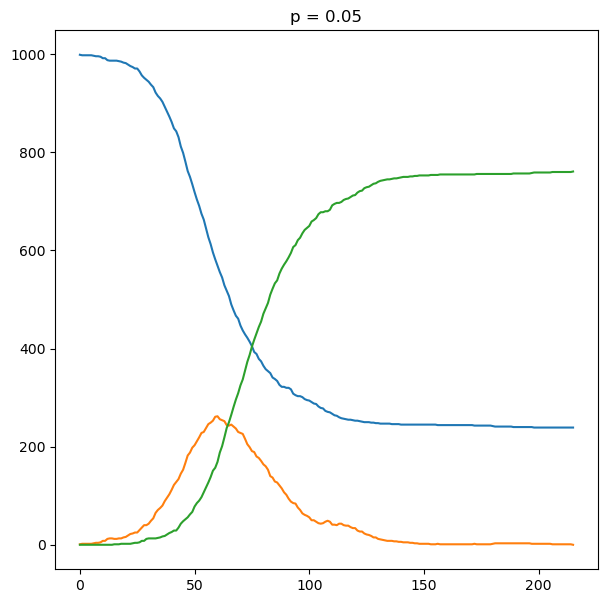

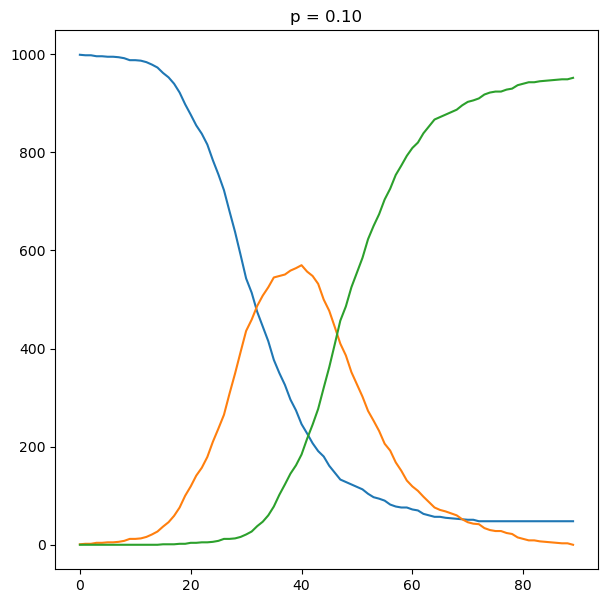

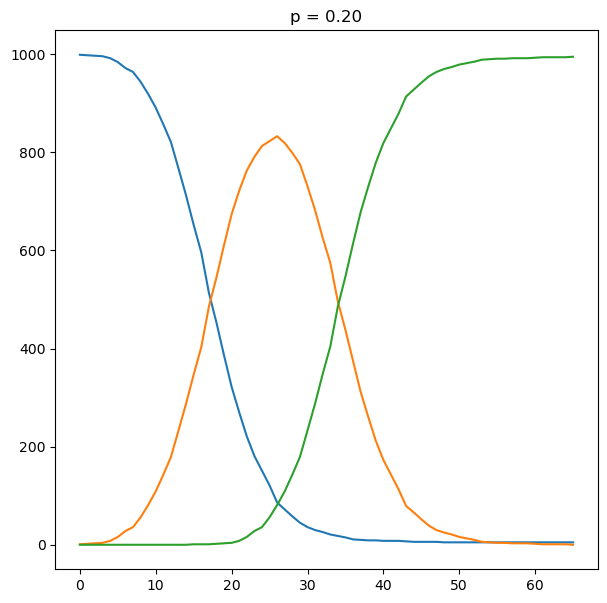

In [252]:
# Baseline variables : effect of p

v = 0.5    # Drift velocity
r = 0.1

for p in [0.05, 0.1, 0.2]:

    plt.figure(figsize = (7,7))
    G = Population(P, L, r, p, T)
    G.start_infection()
    sus, inf, rem = G.baseline_exp(v)
    plt.title('p = %1.2f' %p)
    plt.show()
    

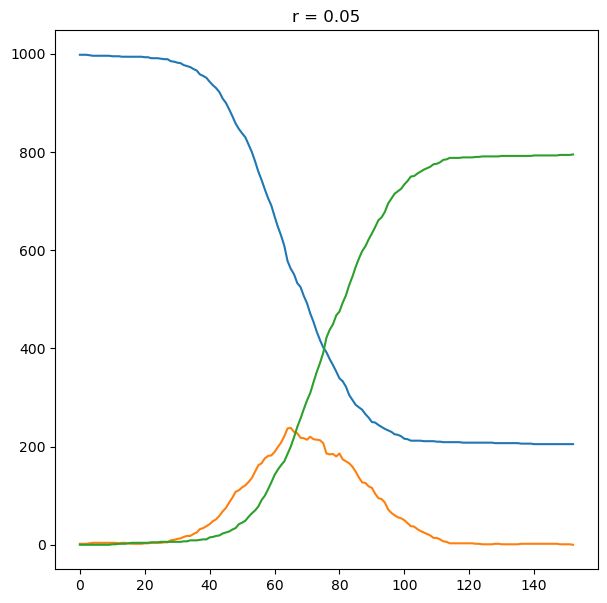

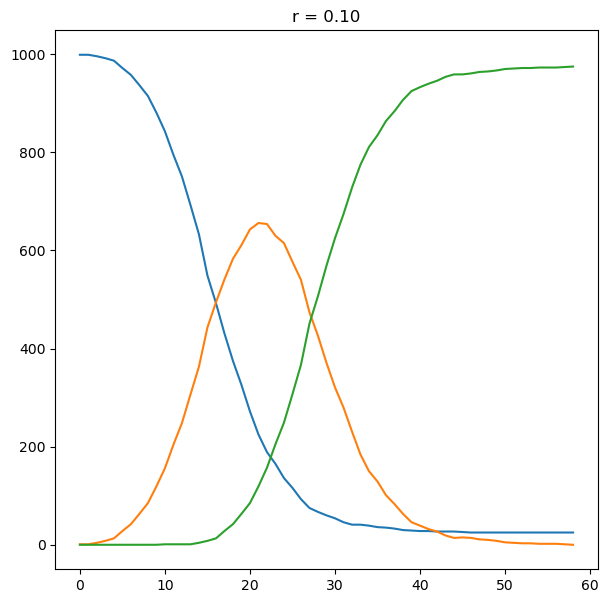

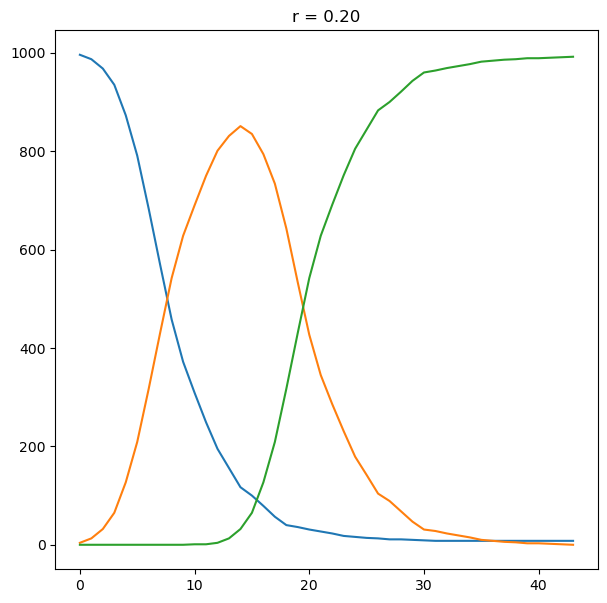

In [253]:
# Baseline variables : effect of r

v = 0.5    # Drift velocity
p = 0.2
D = 10

for r in [0.05, 0.1, 0.2]:

    plt.figure(figsize = (7,7))
    G = Population(P, L, r, p, T)
    G.start_infection()
    sus, inf, rem = G.baseline_exp(v)
    plt.title('r = %1.2f' %r)
    plt.show()
    

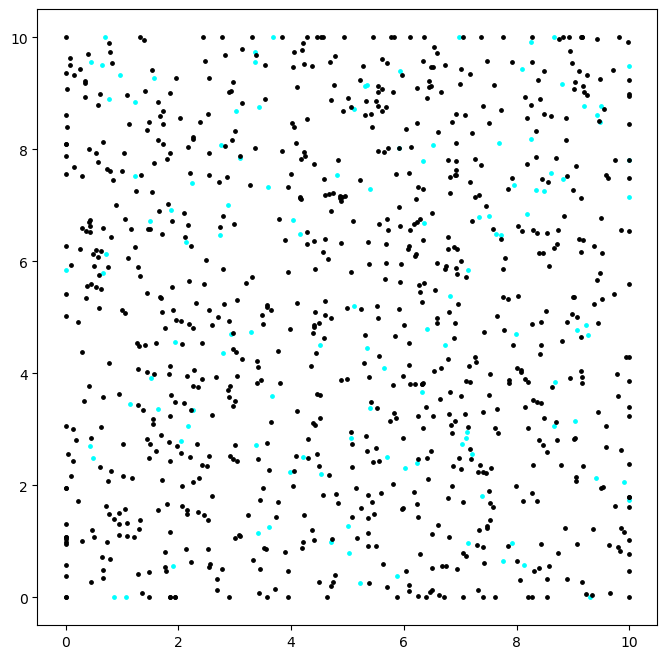

In [262]:
# Baseline variables

v = 0.5    # Drift velocity

G = Population(P, L, r, p, T)
G.start_infection()
G.show_pos()
sus, inf, rem = G.baseline_exp_show(v)

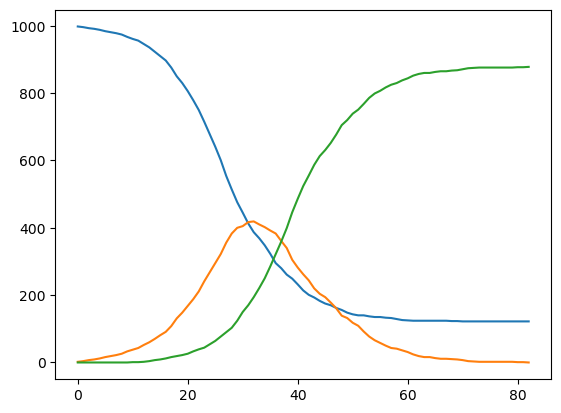

In [263]:
plt.figure()
plt.plot(sus)
plt.plot(inf)
plt.plot(rem)
plt.show()